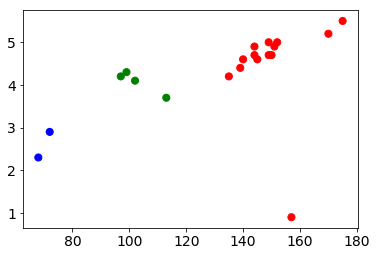

In [5]:
%matplotlib inline
# # Clustering

# ## Agenda:
# 
# 1. K-means clustering
# 2. Clustering evaluation
# 3. DBSCAN clustering

# beer dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer


# How would you cluster these beers?

# define X
X = beer.drop('name', axis=1)


# What happened to y?

# ## Part 1: K-means clustering

# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)


# review the cluster labels
km.labels_


# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values('cluster')


# What do the clusters seem to be based on? Why?

# review the cluster centers
km.cluster_centers_


# calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()


# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()


# allow plots to appear in the notebook
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])


# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)


Text(0,0.5,'alcohol')

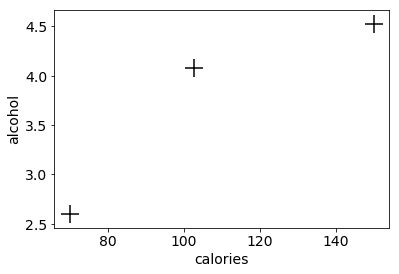

In [6]:
# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a182ae748>,
      dtype=object)

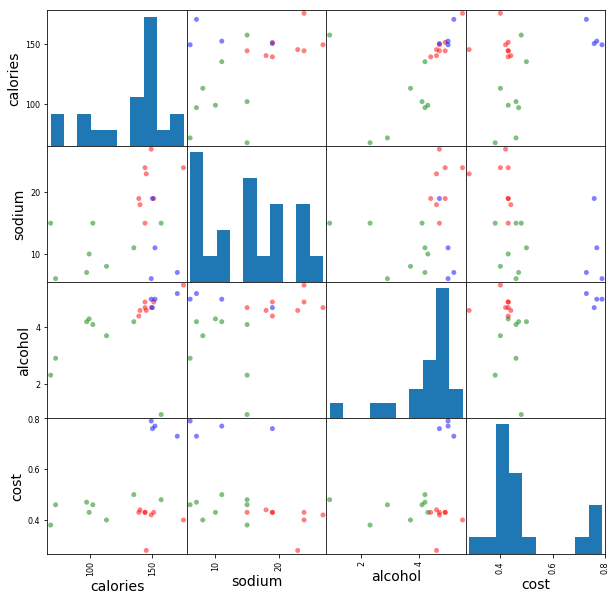

In [10]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/ipykernel_launcher.py:26: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18036a90>,
      dtype=object)

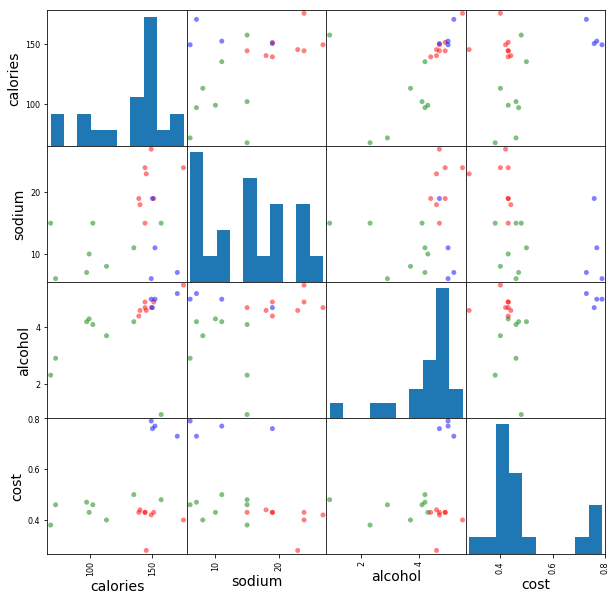

In [9]:
### Repeat with scaled data

# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)


# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values('cluster')


# What are the "characteristics" of each cluster?

# review the cluster centers
beer.groupby('cluster').mean()


# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

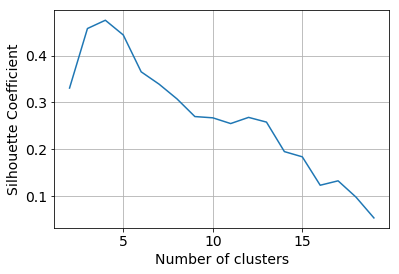

In [11]:
# Do you notice any cluster assignments that seem a bit odd? How might we explain those?

# ## Part 2: Clustering evaluation
# 
# The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.
# 
# A Silhouette Coefficient is calculated for **each observation**:
# 
# $$SC = \frac{b-a} {max(a, b)}$$
# 
# - a = mean distance to all other points in **its cluster**
# - b = mean distance to all other points in **the next nearest cluster**
# 
# It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)


# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))


# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [12]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18e51630>,
      dtype=object)

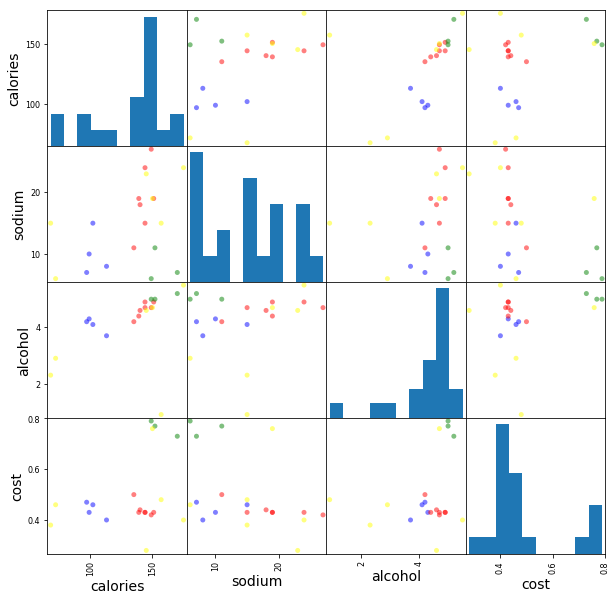

In [13]:
# ## Part 3: DBSCAN clustering

# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)


# review the cluster labels
db.labels_


# save the cluster labels and sort by cluster
beer['cluster'] = db.labels_
beer.sort_values('cluster')


# review the cluster centers
beer.groupby('cluster').mean()


# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)